# Project 3: Evolutionary Tree Analysis, continued

For this week's project, I will be continuing my evolutionary tree analysis by investigating how COVID-19 spread in the United States, specifically looking at the earliest cases and the most recent cases.

## Import data
#### YAML Data (contains collection date and locality information)

In [28]:
import wget
import yaml
import numpy as np

# Get file
yamlURL = 'https://www.ncbi.nlm.nih.gov/core/assets/genbank/files/ncov-sequences.yaml'
file = 'ncov-sequences.yaml'
wget.download(yamlURL, file)

# Read in YAML file
with open(file, 'r') as stream:
    accession_data = yaml.safe_load(stream)

## Read sequences into a table

The sequence data in the CSV file was attained using the Virulign software.

In [29]:
import pandas as pd
position_table = pd.read_csv('../../data/position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [30]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT326159.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


In [31]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


## Adding state, country, and date information to our sequence data table

Now we will add extra information about every sequence provided by the accession data.

First, we will put the data we want in dictionaries with the sequence ID as the key:

In [32]:
position_table['id'] = position_table['seqid'].str.slice(stop=-2)

acc = accession_data['genbank-sequences']
countries = {}
states = {}
dates = {}
for entry in acc:
    state = None
    curId = entry['accession']
    country = entry['country']
    if country != None and ':' in country:
        colon_index = country.index(':')
        state = country[colon_index+2:]
        country = country[:colon_index]
    date = entry['collection-date']
    countries[curId] = country
    states[curId] = state or None
    dates[curId] = date


Next, we will write functions to return the correct values from each dictionary, so we can put these values in our data table.

In [33]:
def get_country(id):
    if id in countries.keys():
        return countries[id]
    else:
        return None

def get_state(id):
    if id in states.keys():
        return states[id]
    else:
        return None

def get_date(id):
    if id in dates.keys():
        return dates[id]
    else:
        return None

position_table['country'] = position_table['id'].apply(get_country)
position_table['state'] = position_table['id'].apply(get_state)
position_table['date'] = position_table['id'].apply(get_date)
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3,id,country,state,date
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT007544,Australia,Victoria,2020-01-25
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019529,China,"Hubei, Wuhan",2019-12-23
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019530,China,"Hubei, Wuhan",2019-12-30
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019531,China,"Hubei, Wuhan",2019-12-30
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019532,China,"Hubei, Wuhan",2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334544,USA,UT,2020-03-19
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334546,USA,UT,2020-03-19
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334547,USA,UT,2020-03-19
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334557,USA,UT,2020-03-20


## Viewing States and Countries in the Dataset

In [34]:
position_table["country"].unique()

array(['Australia', 'China', 'USA', 'South Korea', 'Taiwan', 'Nepal',
       'Sweden', 'Brazil', 'India', 'Italy', 'Viet Nam', 'Spain',
       'Pakistan', 'Peru', 'Israel', 'France', 'Iran', 'South Africa',
       'Turkey', 'Greece'], dtype=object)

In [35]:
position_table["state"].unique()

array(['Victoria', 'Hubei, Wuhan', 'WA', 'CA', 'Hangzhou', 'WI', 'MA',
       None, 'IL', 'Yunnan', 'TX', 'Guangdong, Guangzhou', 'Guangzhou',
       'Beijing', 'Snohomish County, WA', 'Kerala State', 'Shanghai',
       'MN', 'CA, San Diego County', 'Ho Chi Minh city', 'Valencia',
       'Gilgit', 'CT', 'Zhejiang, Hangzhou', 'San Francisco, CA', 'KPK',
       'RI', 'GA', 'OR', 'FL', 'Anhui, Fuyang', 'Wuhan', 'North Carolina',
       'AZ', 'NH', 'NY', 'MI', 'NC', 'VA', 'KwaZulu-Natal', 'DC', 'IA',
       'IN', 'KS', 'LA', 'MD', 'MO', 'NE', 'NJ', 'NV', 'OH', 'PA', 'SC',
       'UT'], dtype=object)

## Get earliest and most recent sequences

In [36]:
#position_table = position_table.set_index('seqid')
position_table["date"] = pd.to_datetime(position_table["date"])
position_table["date"] 

# 100 earliest
early_table = position_table[position_table['country'] == "USA"].nsmallest(100, "date")

# 100 most recent
recent_table = position_table[position_table['country'] == "USA"].nlargest(100, "date")

early_table = early_table.set_index('seqid')
early_seq = early_table.index

recent_table = recent_table.set_index('seqid')
recent_seq = recent_table.index

## 100 Earliest Sequences

In [37]:
early_seq

Index(['MT326173.1', 'MT233526.1', 'MT246667.1', 'MT020880.1', 'MT020881.1',
       'MT044258.1', 'MT044257.1', 'MT027062.1', 'MT027063.1', 'MT027064.1',
       'MT039888.1', 'MT039887.1', 'MT106052.1', 'MT106053.1', 'MT106054.1',
       'MT159705.1', 'MT159706.1', 'MT159707.1', 'MT159708.1', 'MT159710.1',
       'MT159717.1', 'MT184911.1', 'MT184912.1', 'MT159713.1', 'MT159714.1',
       'MT159718.1', 'MT159719.1', 'MT184907.1', 'MT184910.1', 'MT159709.1',
       'MT159711.1', 'MT159720.1', 'MT159721.1', 'MT159722.1', 'MT184908.1',
       'MT184909.1', 'MT118835.1', 'MT152824.1', 'MT159715.1', 'MT159716.1',
       'MT184913.1', 'MT159712.1', 'MT276324.1', 'MT163716.1', 'MT276325.1',
       'MT276328.1', 'MT163717.1', 'MT276323.1', 'MT276329.1', 'MT276330.1',
       'MT163718.1', 'MT276326.1', 'MT276327.1', 'MT276331.1', 'MT304484.1',
       'MT304489.1', 'MT163719.1', 'MT263438.1', 'MT263454.1', 'MT304482.1',
       'MT304483.1', 'MT304487.1', 'MT304488.1', 'MT304490.1', 'MT304491.1',

## 100 Most Recent Sequences

In [38]:
recent_seq

Index(['MT300186.1', 'MT308702.1', 'MT308703.1', 'MT308704.1', 'MT293156.1',
       'MT293173.1', 'MT293175.1', 'MT293163.1', 'MT293185.1', 'MT293188.1',
       'MT293192.1', 'MT293195.1', 'MT293174.1', 'MT295465.1', 'MT293178.1',
       'MT334561.1', 'MT324684.1', 'MT263383.1', 'MT263390.1', 'MT263392.1',
       'MT263398.1', 'MT263399.1', 'MT263404.1', 'MT263408.1', 'MT263414.1',
       'MT263417.1', 'MT263421.1', 'MT263424.1', 'MT263425.1', 'MT263430.1',
       'MT263431.1', 'MT263432.1', 'MT263434.1', 'MT263435.1', 'MT263436.1',
       'MT263439.1', 'MT263440.1', 'MT263441.1', 'MT263442.1', 'MT263443.1',
       'MT263445.1', 'MT263446.1', 'MT263449.1', 'MT263450.1', 'MT263453.1',
       'MT263455.1', 'MT263456.1', 'MT263459.1', 'MT326023.1', 'MT326024.1',
       'MT326027.1', 'MT326028.1', 'MT326029.1', 'MT326030.1', 'MT326056.1',
       'MT326058.1', 'MT326063.1', 'MT326065.1', 'MT326066.1', 'MT326067.1',
       'MT326068.1', 'MT326069.1', 'MT326070.1', 'MT326076.1', 'MT326078.1',

## Create Distance Matrix

In [48]:
def get_distance_matrix(subset_seqs, position_table):
    distances = {}
    for i in range(len(subset_seqs)):
        s1 = subset_seqs[i]
        for j in range(i+1, len(subset_seqs)):
            s2 = subset_seqs[j]
            distances[s1, s2] = sum(position_table.loc[s1] != position_table.loc[s2])
            distances[s2, s1] = distances[s1, s2]
    distances = pd.Series(distances).unstack()
    return distances  

early_distances = get_distance_matrix(early_seq, early_table)
recent_distances = get_distance_matrix(recent_seq, recent_table)

# Using Biopython
def get_biopython_matrix(distances):
    matrix = np.tril(distances.values).tolist()
    for i in range(len(matrix)):
        matrix[i] = matrix[i][:i+1]
    d_matrix = DistanceMatrix(list(distances.index), matrix)
    return d_matrix

early_d_matrix = get_biopython_matrix(early_distances)
recent_d_matrix = get_biopython_matrix(recent_distances)


## Add color to our trees

In [40]:
early_states = early_table["state"].unique()
recent_states = recent_table["state"].unique()

In [69]:
colors = []
for color in Phylo.BaseTree.BranchColor.color_names:
    if len(color) > 1 and color != "white" and color != "yellow" and color != "grey":
        colors.append(color)
colors

['red',
 'green',
 'cyan',
 'blue',
 'magenta',
 'black',
 'maroon',
 'olive',
 'lime',
 'aqua',
 'teal',
 'navy',
 'fuchsia',
 'purple',
 'silver',
 'gray',
 'pink',
 'salmon',
 'orange',
 'gold',
 'tan',
 'brown']

In [74]:
# Create state to color maps
early_dict = {}
recent_dict = {}
for i in range(len(early_states)):
    early_dict[early_states[i]] = colors[i]
for i in range(len(recent_states)):
    recent_dict[recent_states[i]] = colors[i]
    
early_dict

{None: 'red',
 'WA': 'green',
 'CA': 'cyan',
 'IL': 'blue',
 'MA': 'magenta',
 'WI': 'black',
 'TX': 'maroon',
 'Snohomish County, WA': 'olive',
 'OR': 'lime',
 'RI': 'aqua',
 'FL': 'teal',
 'GA': 'navy',
 'NH': 'fuchsia',
 'VA': 'purple',
 'AZ': 'silver'}

In [75]:
recent_dict

{'North Carolina': 'red',
 'NC': 'green',
 'WA': 'cyan',
 None: 'blue',
 'UT': 'magenta'}

## Construct Phylogenetic Trees

In [71]:
# Import stuff 
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

### Earliest 100 sequences in the US

/Users/ericnewcomer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


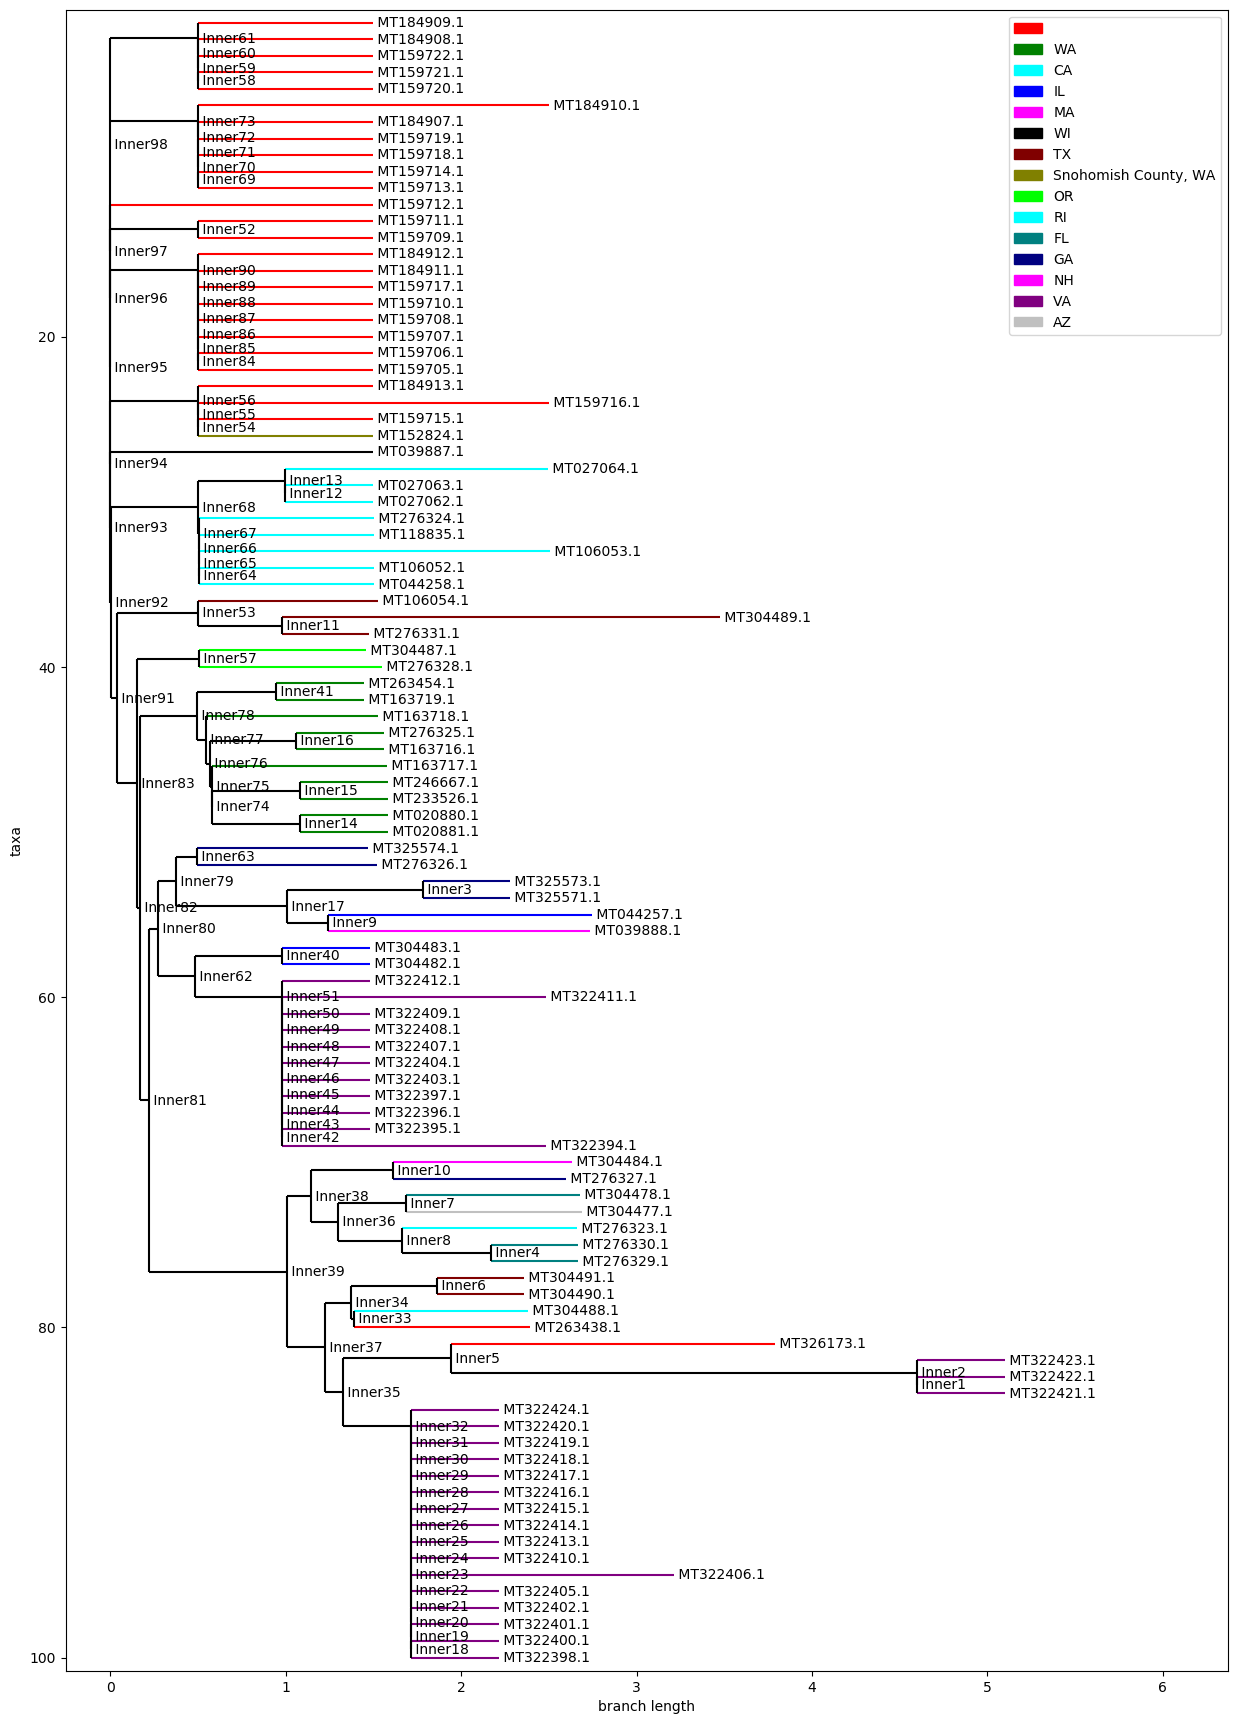

In [80]:
# Using Neighbor Joining Method
dt_constructor = DistanceTreeConstructor()
nj_tree_early = dt_constructor.nj(early_d_matrix)
%matplotlib inline
nj_tree_early.ladderize()

# Create legend
patches = []
for state in early_dict:
    p = mpatches.Patch(color=early_dict[state], label=state)
    patches.append(p)
    
for clade in nj_tree_early.get_terminals():
    state = states[clade.name.split(".")[0]]
    clade.color = early_dict[state]


fig = plt.figure(figsize=(15, 22), dpi=100)
plt.legend(handles=patches)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(nj_tree_early, axes=axes)

### 100 Most Recent Sequences in the US

/Users/ericnewcomer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


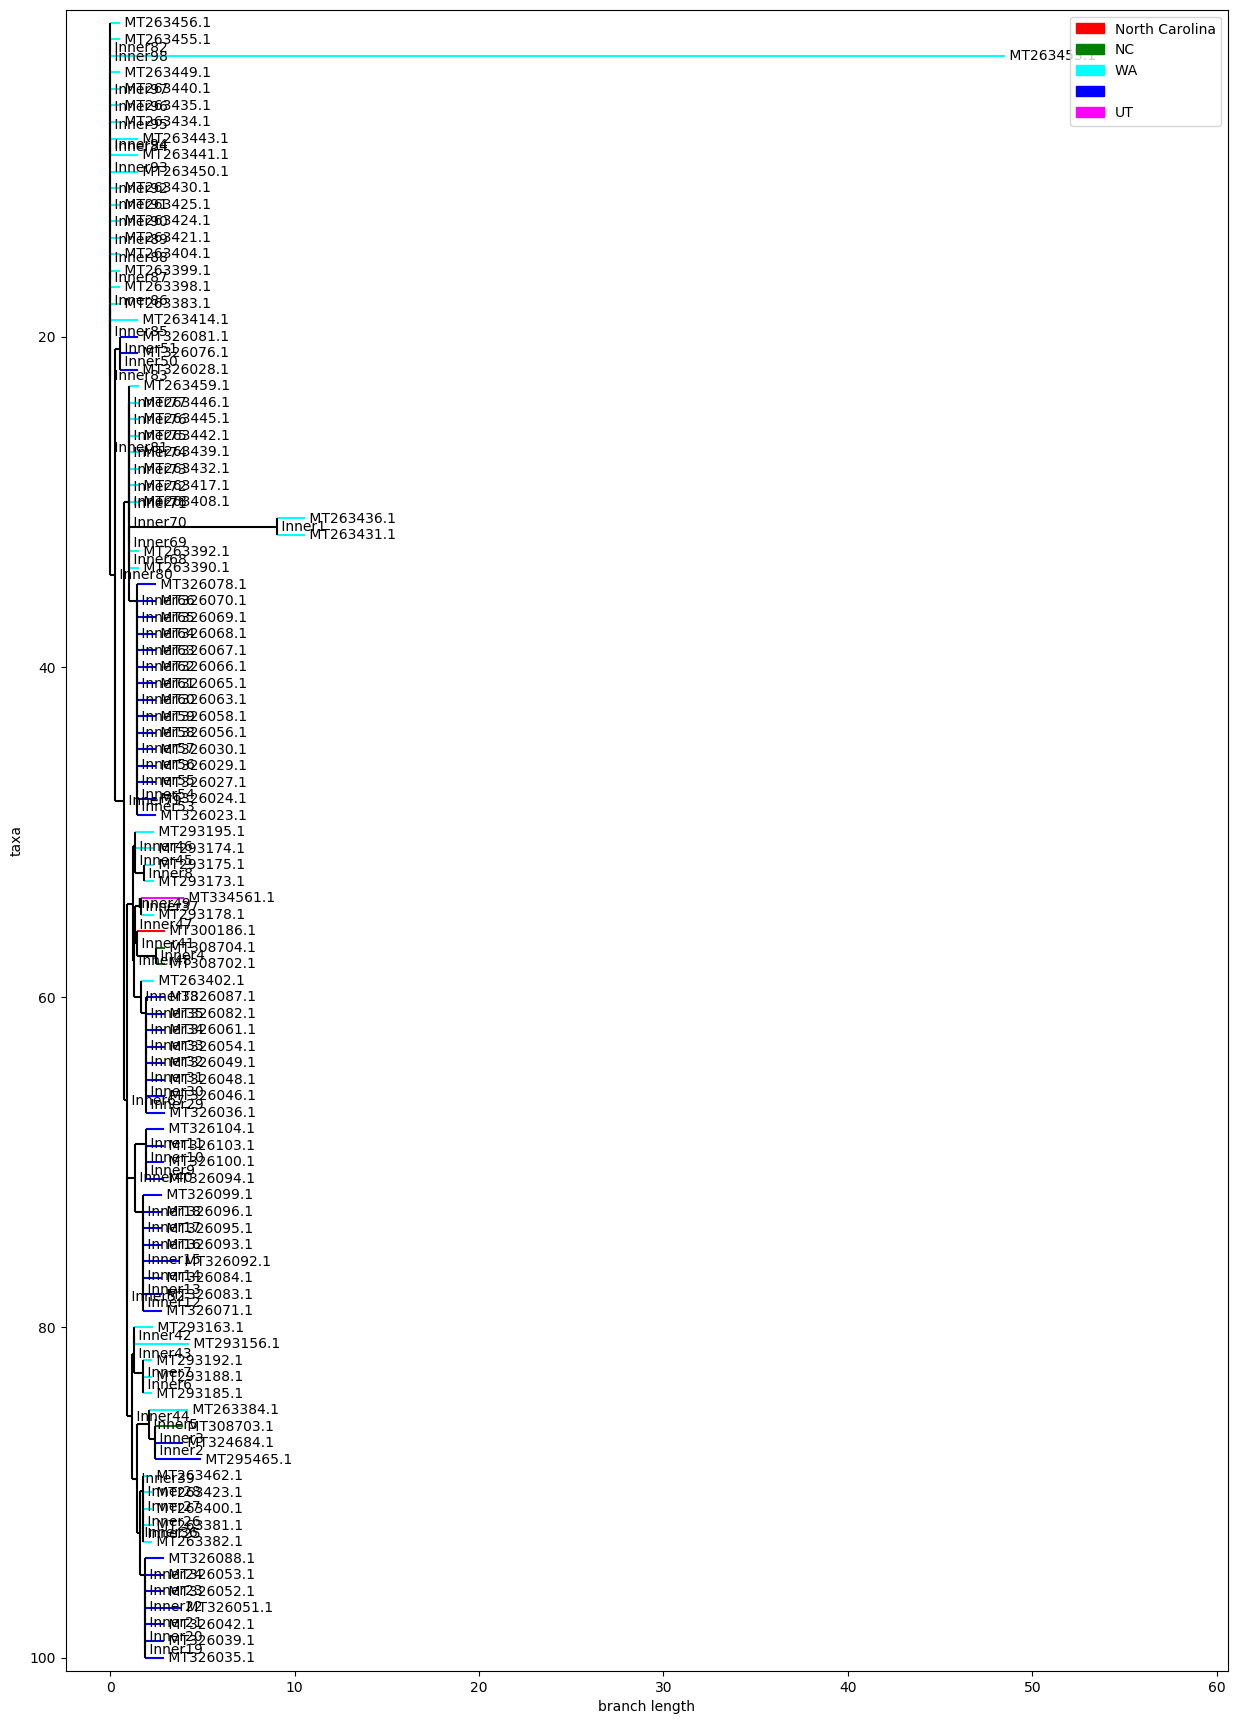

In [84]:
# Using Neighbor Joining Method
dt_constructor = DistanceTreeConstructor()
nj_tree_recent = dt_constructor.nj(recent_d_matrix)
%matplotlib inline
nj_tree_recent.ladderize()

# Create legend
patches = []
for state in recent_dict:
    p = mpatches.Patch(color=recent_dict[state], label=state)
    patches.append(p)
    
for clade in nj_tree_recent.get_terminals():
    state = states[clade.name.split(".")[0]]
    clade.color = recent_dict[state]


fig = plt.figure(figsize=(15, 22), dpi=100)
plt.legend(handles=patches)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(nj_tree_recent, axes=axes)

## Conclusion

The phylogenetic tree of the earliest 100 sequences shows a lot of variation, with over 14 states represented (red represents early sequences where the state was not specified). The difference in sequences makes sense, as different areas of the country are exposed to travelers from different regions. In contrast, the tree of the 100 most recent cases shows many sequences that are not very far apart (different) from each other. This tree only has 4 states represented (with one state not specified), which somewhat explains the lack of variation in the genome sequences. This analysis suggests that different regions are likely to have more differences in their genome sequences than regions that are the same or close in proximity. 